In [1]:
import pandas as pd
import numpy as np 
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, classification_report,confusion_matrix , accuracy_score, f1_score
import sys
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/gamma_stft.xlsx',sheet_name='S-ZONF')
df.head()

,mean,variance,skewness,kurtosis
0,12.466769,351.389569,1.355803,4.392854
1,20.642700,1068.050678,1.362178,4.245450
2,16.890266,689.796409,1.694983,6.497073
3,4.183841,36.506889,1.246755,4.294954
4,12.672505,396.686673,1.346155,4.098919


In [3]:
target = pd.read_excel('/content/gamma_stft.xlsx',sheet_name='target S-ZONF')

#PCA

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_data = scaler.transform(df)


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)

In [8]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
x_pca = pca.transform(scaled_data)

In [10]:
scaled_data.shape

(500, 4)

In [11]:
x_pca.shape

(500, 3)

Text(0, 0.5, 'Second principal component')

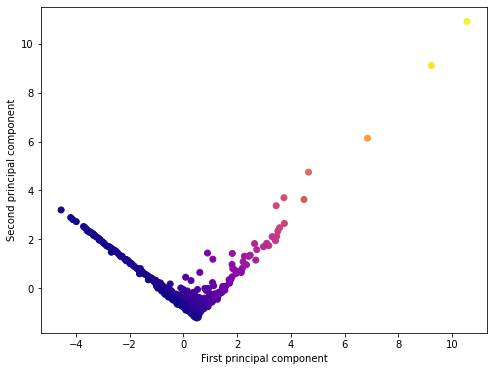

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['mean'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [13]:
x=df.iloc[:,0:]
y=target

In [14]:
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test =train_test_split(x,y,train_size =.8)

#DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [16]:
import numpy as np
from sklearn.utils.multiclass import is_multilabel

In [17]:
model.fit(x_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
?# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()


# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 4)

tree_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Object `` not found.
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 5}
Best score is 0.87


In [20]:
y_pred = tree_cv.predict(x_Test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.87


In [22]:
dtc_acc = accuracy_score(y_Test,y_pred)
print(dtc_acc)

0.87


In [23]:
results = pd.DataFrame()
results

""


In [24]:
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.87


##Logistic Regression

In [25]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 9, 13)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 6)
  
logreg_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.00014677992676220705}
Best score is 0.8700060304537917


In [26]:
y_pred = logreg_cv.predict(x_Test)

In [27]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [28]:
y_Test

,target
196,0
24,1
96,1
371,0
404,0
...,...
449,0
100,0
349,0
294,0


In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.89


In [30]:
lr_acc = accuracy_score(y_Test, y_pred)
print(lr_acc)

0.89


In [31]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.87
0,Logistic Regression Method,0.89


#SVM-Linear

In [32]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_Train, y_Train)

#Predict the response for test dataset
y_pred = clf.predict(x_Test)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[78,  2],
       [ 8, 12]])

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.9


In [35]:
svm_lin_acc = accuracy_score(y_Test,y_pred)
print(svm_lin_acc)

0.9


In [36]:
tempResults = pd.DataFrame({'Algorithm':['SVM-Linear Karnel Classifier Method'], 'Accuracy':[svm_lin_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.87
0,Logistic Regression Method,0.89
0,SVM-Linear Karnel Classifier Method,0.90


#KNN

In [37]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[9,10,11,12,13,14],
          'leaf_size':[5,6,7,8,9],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(x_Train, y_Train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}


In [38]:
# Predicting the Test set results
y_pred = model1.predict(x_Test)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[75,  5],
       [ 6, 14]])

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.89


In [41]:
knn_acc = accuracy_score(y_Test, y_pred)
print(knn_acc)

0.89


In [42]:
tempResults = pd.DataFrame({'Algorithm':['KNN Classifier Method'], 'Accuracy':[knn_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.87
0,Logistic Regression Method,0.89
0,SVM-Linear Karnel Classifier Method,0.90
0,KNN Classifier Method,0.89


##RandomForest

In [43]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.datasets import make_classification
xTrain, yTrain = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xTrain, yTrain)
RandomForestClassifier(...)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=Ellipsis,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)

[0.14205973 0.76664038 0.0282433  0.06305659]


In [45]:
y_pred = clf.predict(x_Test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
accuracy_score(y_Test, y_pred)

0.2

In [47]:
rfc_acc = accuracy_score(y_Test,y_pred)
print(rfc_acc)

0.2


In [48]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.87
0,Logistic Regression Method,0.89
0,SVM-Linear Karnel Classifier Method,0.90
0,KNN Classifier Method,0.89
0,Random Forest Classifier Method,0.20


#EDA

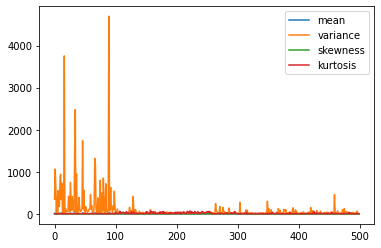

In [49]:
df.plot()

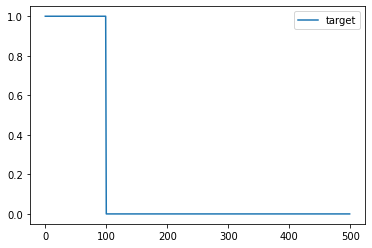

In [50]:
target.plot()

,mean,variance,skewness,kurtosis
mean,1.000000,0.889442,-0.318426,-0.310009
variance,0.889442,1.000000,-0.162564,-0.156922
skewness,-0.318426,-0.162564,1.000000,0.988875
kurtosis,-0.310009,-0.156922,0.988875,1.000000


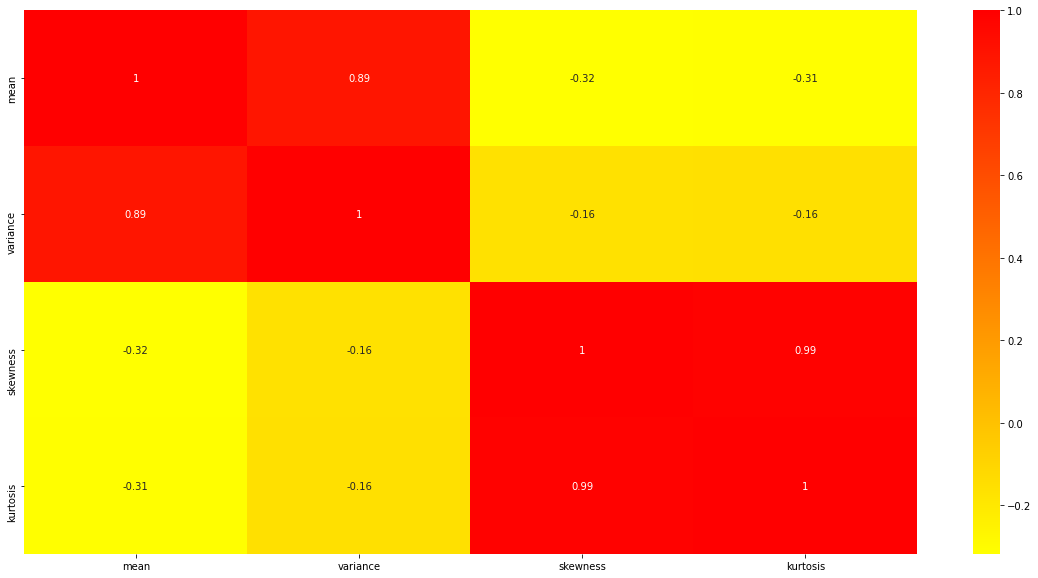

In [51]:
#find the relation between the vriables :
plt.figure(figsize =(20,10))
c = df.corr()
sns.heatmap(c,cmap = "autumn_r",annot = True)
c

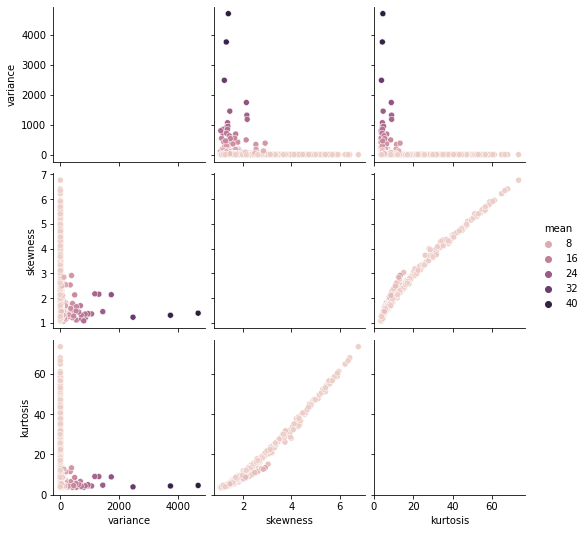

In [52]:
sns.pairplot(df,hue ='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09540cee90>,
      dtype=object)

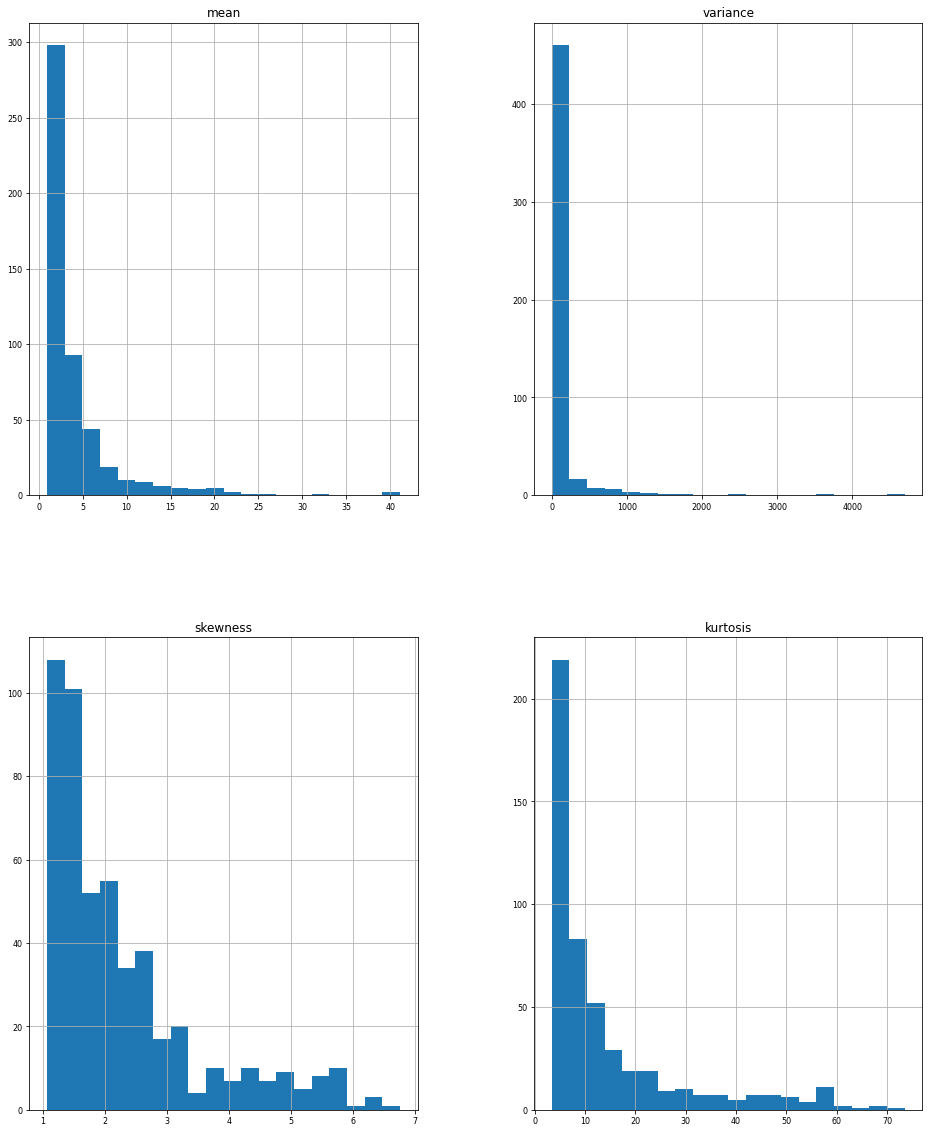

In [53]:
df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)

##Perform Kmean Clustering

In [54]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [55]:
# Scale the Dataset
df_scaled = df.apply(zscore)

In [56]:
# Let us check optimal number of clusters-

# expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
 
    # capture the cluster lables
  labels = clusters.labels_

# capture the centroids
  centroids = clusters.cluster_centers_

    # capture the intertia
  cluster_errors.append( clusters.inertia_ )

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2000.000000
1,2,1211.033117
2,3,645.702486
3,4,393.335711
4,5,257.986049
5,6,201.300813
6,7,160.523009
7,8,128.029585
8,9,106.726792


In [57]:
# Number of clusters
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [58]:
# Fitting the input data
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [59]:
#Centroids
centroids=kmeans.cluster_centers_

In [60]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [61]:
centroid_df

,mean,variance,skewness,kurtosis
0,-0.542865,-0.261277,2.060418,2.111495
1,-0.101279,-0.138297,-0.341357,-0.352968
2,3.685841,3.418477,-0.661940,-0.620525


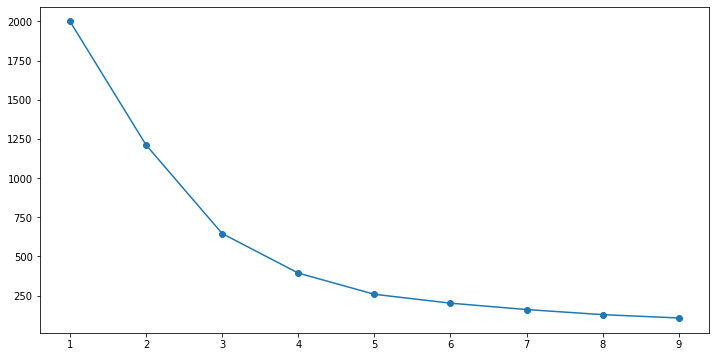

In [62]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

# Use silhouette_Coffeceint to Find best No of Cluster

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6018050765883383


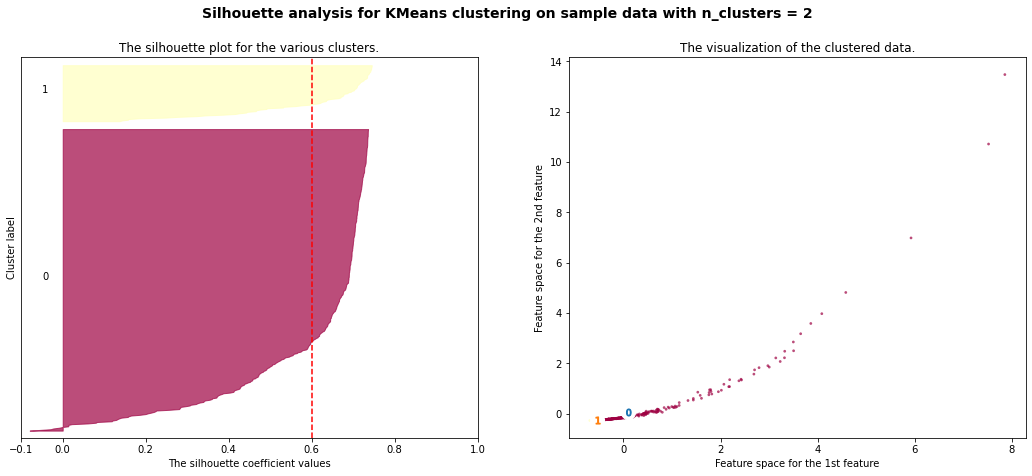

For n_clusters = 3 The average silhouette_score is : 0.6561959910387104


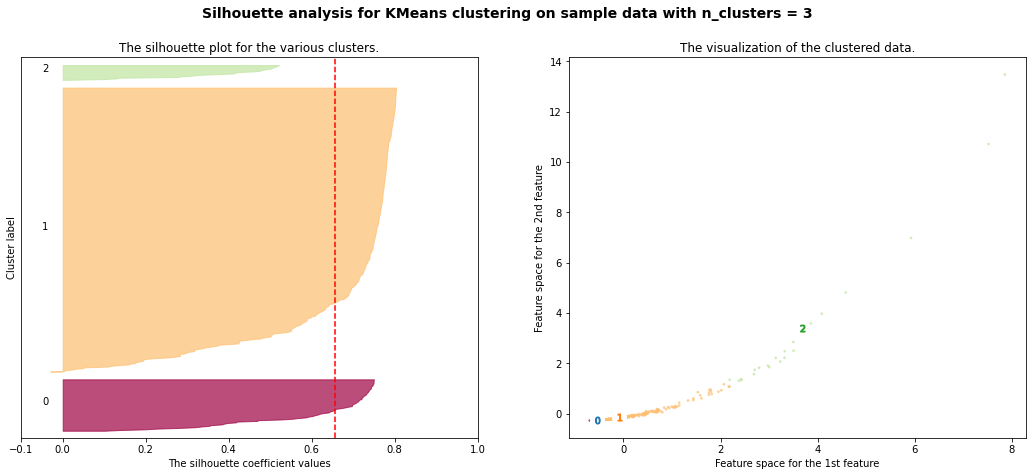

For n_clusters = 4 The average silhouette_score is : 0.6481133605948348


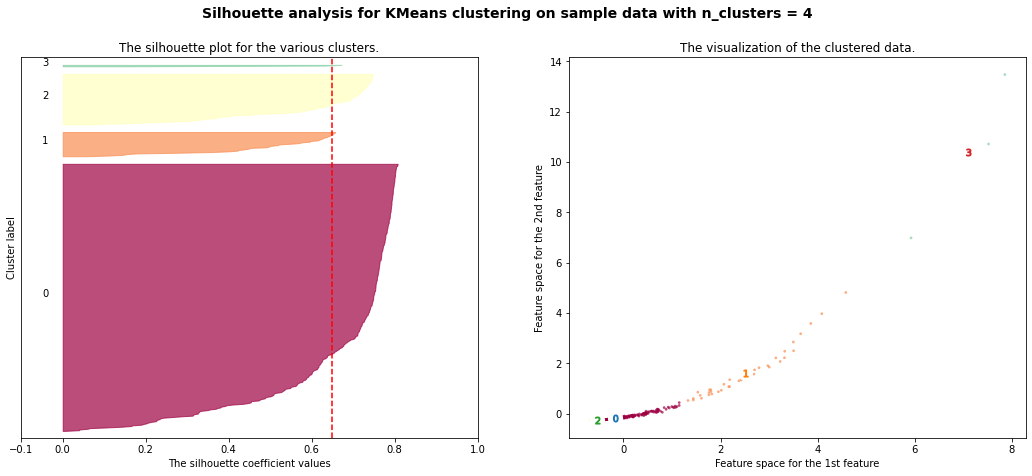

For n_clusters = 5 The average silhouette_score is : 0.5252911957037242


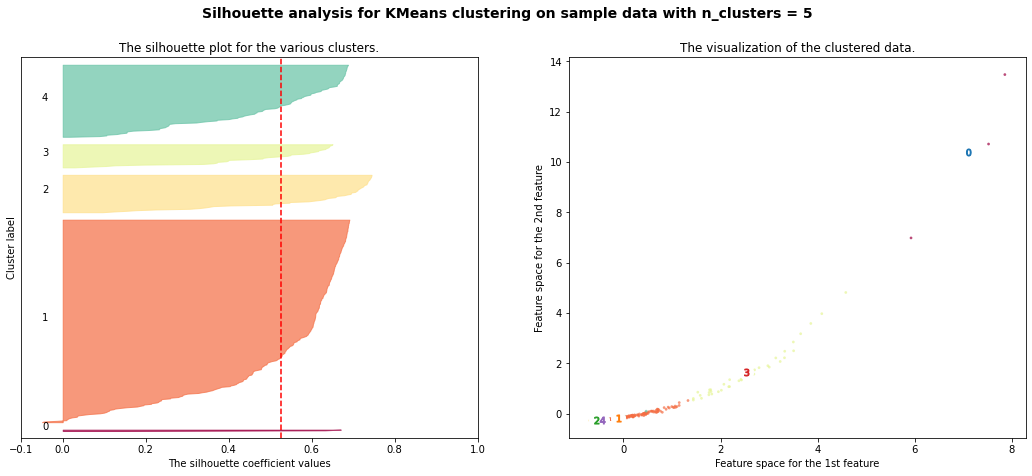

For n_clusters = 6 The average silhouette_score is : 0.49829410523329204


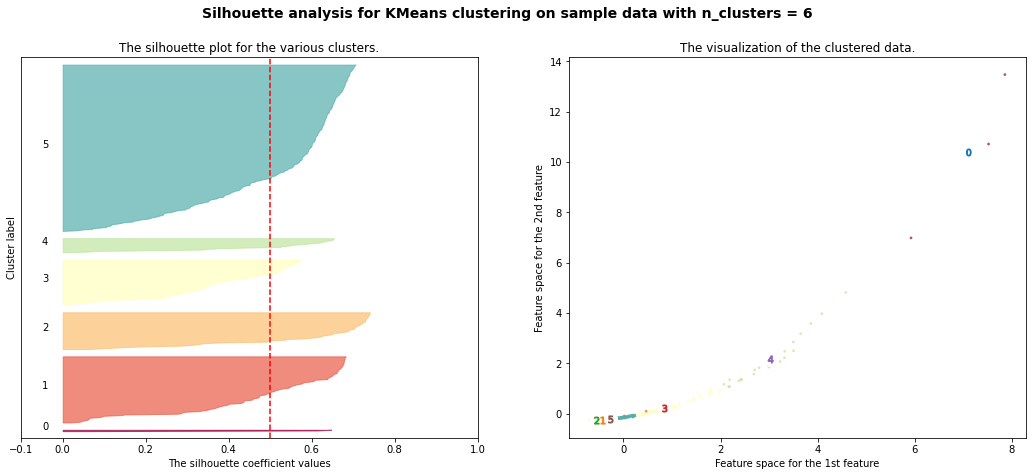

For n_clusters = 7 The average silhouette_score is : 0.4768360926971368


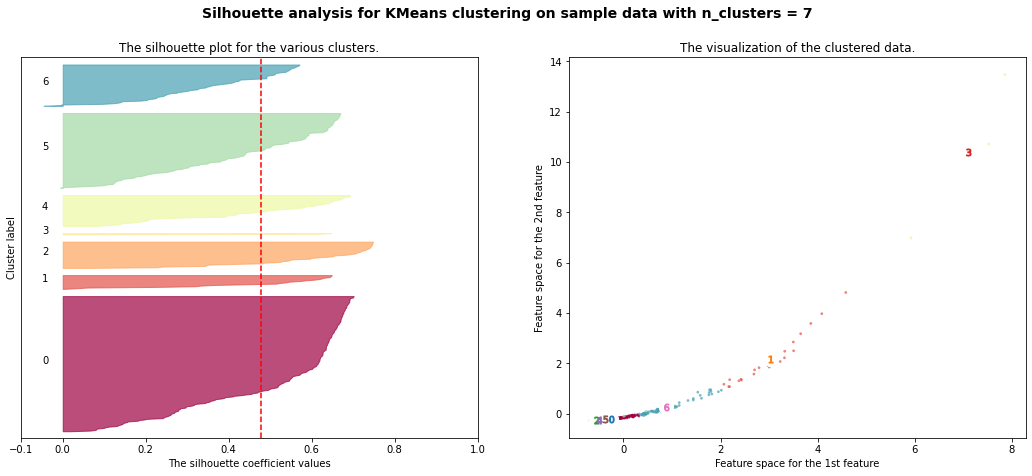

For n_clusters = 8 The average silhouette_score is : 0.47445939867830156


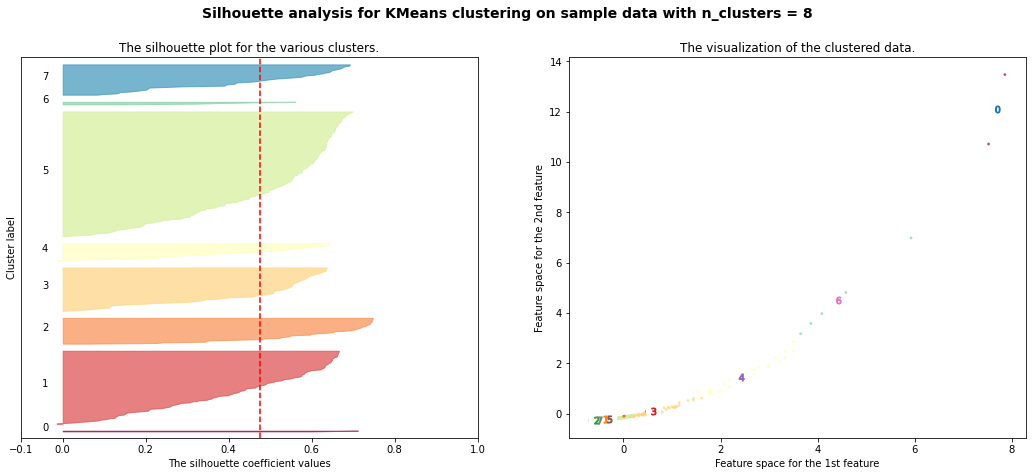

For n_clusters = 9 The average silhouette_score is : 0.47203356214808945


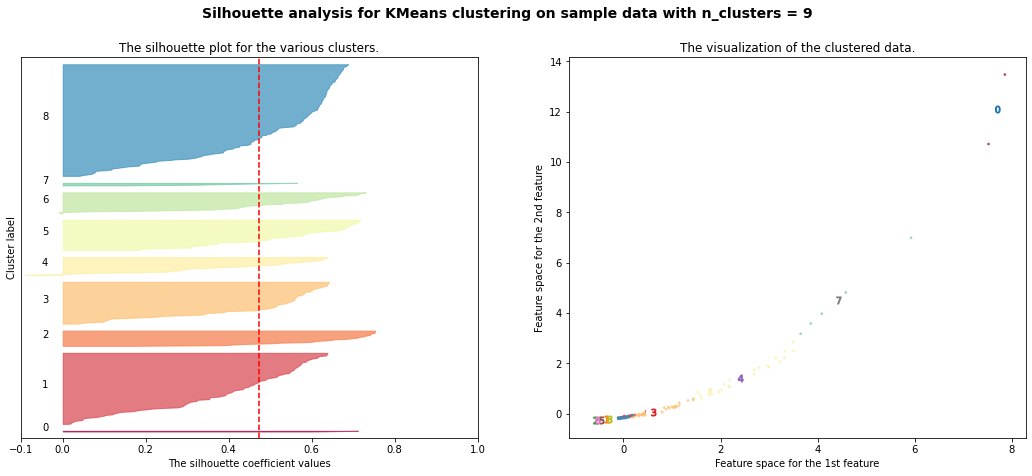

For n_clusters = 10 The average silhouette_score is : 0.4635829884783101


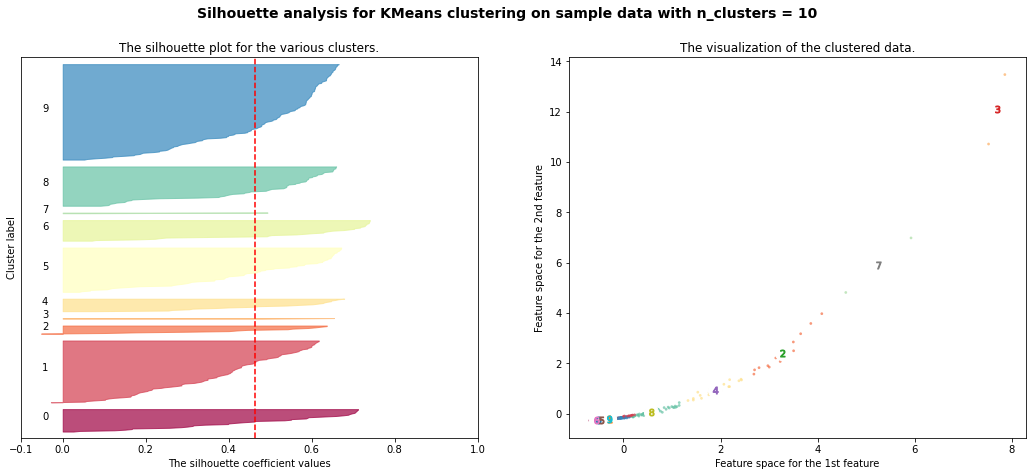

For n_clusters = 11 The average silhouette_score is : 0.46248115995674305


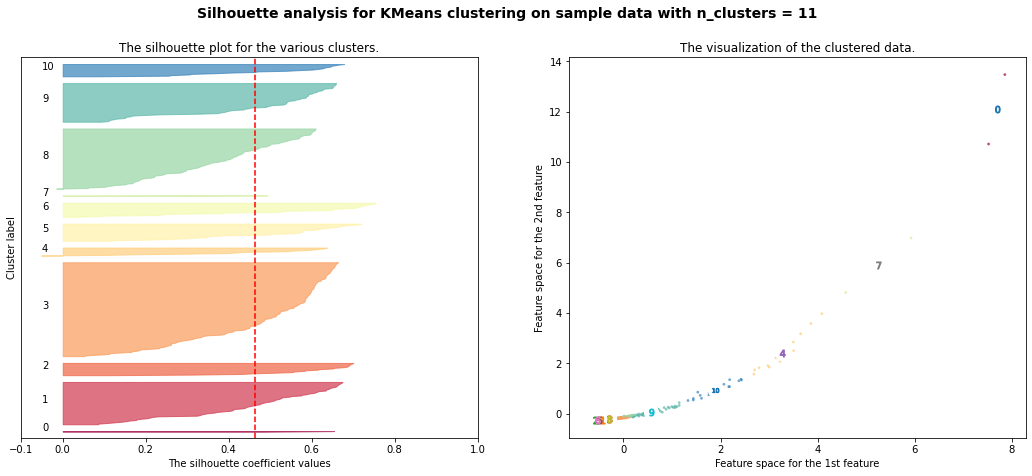

For n_clusters = 12 The average silhouette_score is : 0.44396629310525826


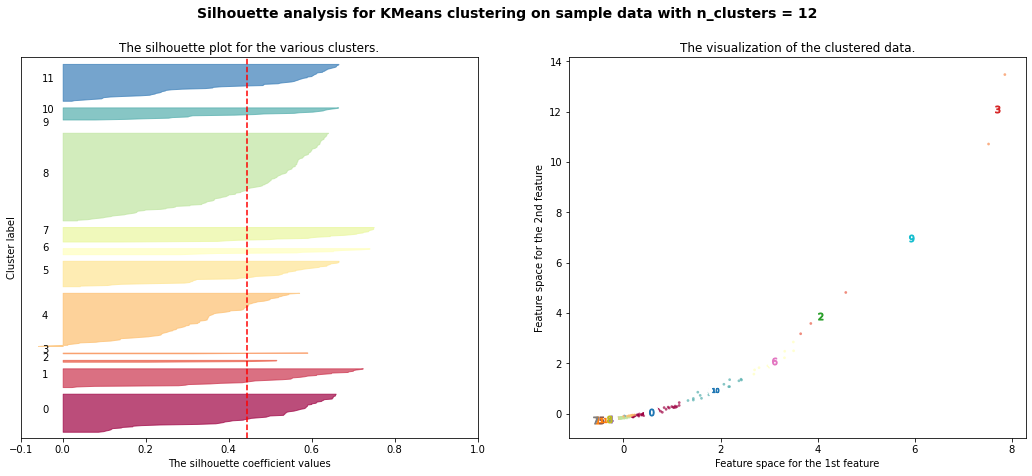

For n_clusters = 13 The average silhouette_score is : 0.4344417797376467


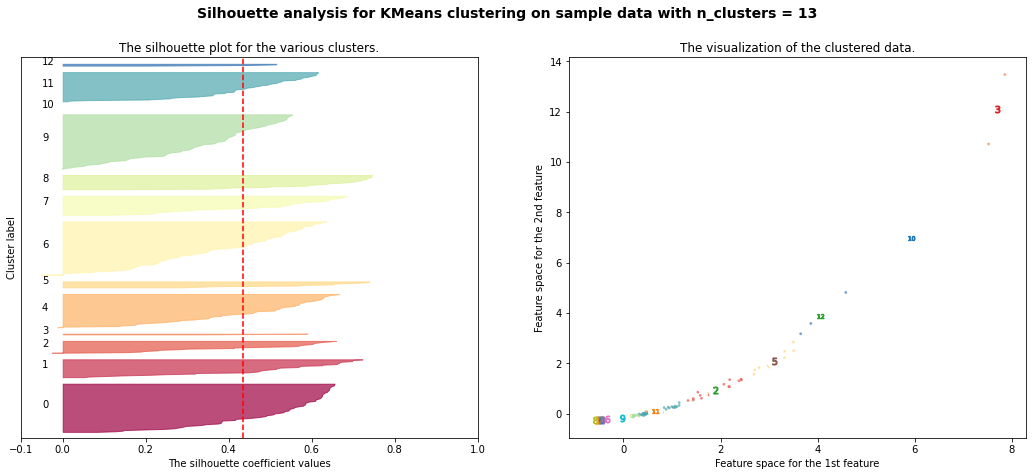

For n_clusters = 14 The average silhouette_score is : 0.4305299954191597


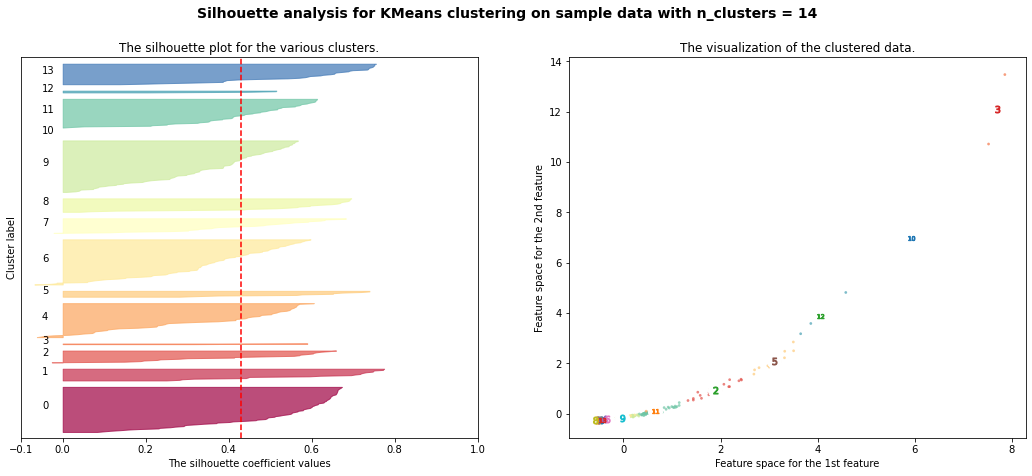

For n_clusters = 15 The average silhouette_score is : 0.43022472589161237


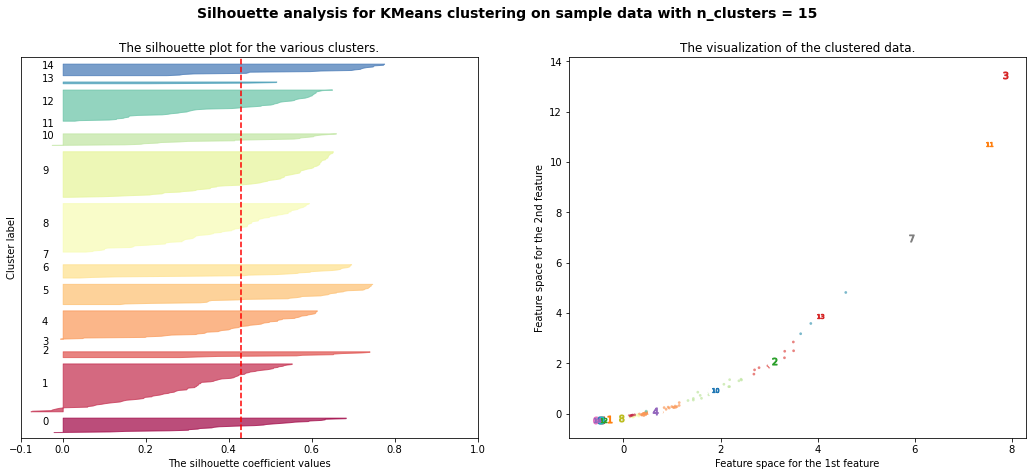

In [63]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Build a Dendogram

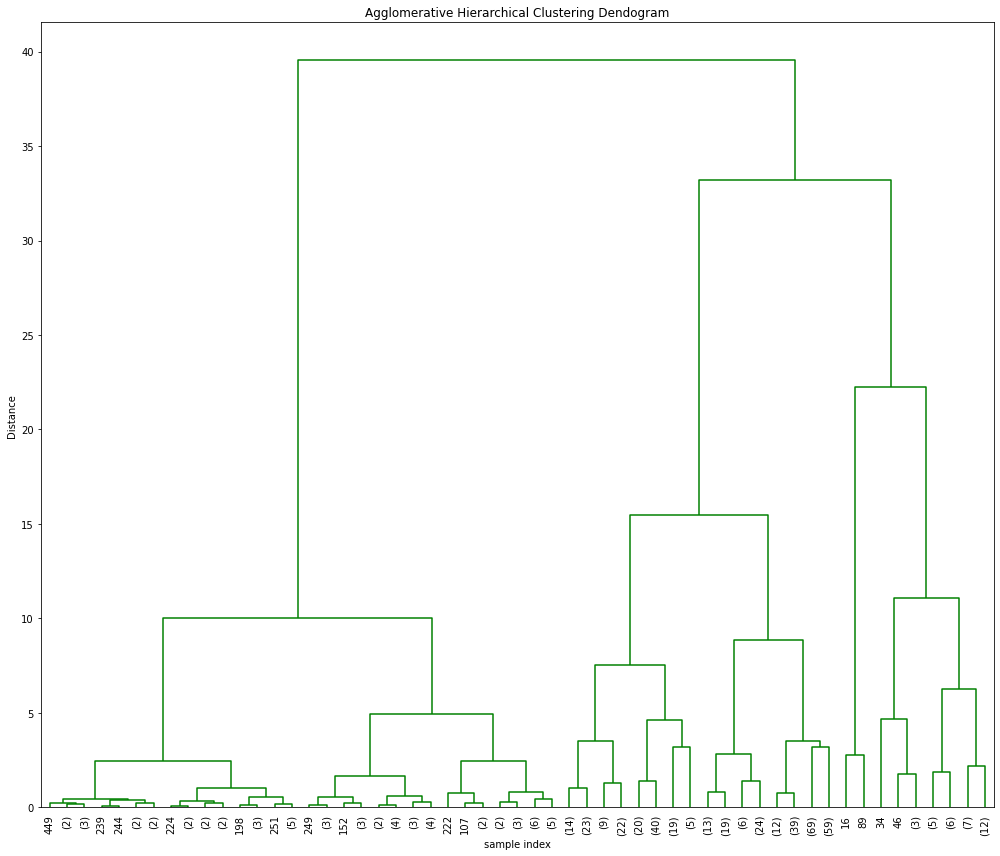

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(14, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [65]:
from sklearn.svm import SVC

In [66]:
model =SVC(gamma=100)

In [67]:
model.fit(x_Train,y_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
model.score(x_Test,y_Test)

0.8

#XGBoost

In [69]:
import numpy as np
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score

from xgboost.sklearn import XGBClassifier

In [70]:
model =XGBClassifier()
eval_set =[(x_Train,y_Train)]
model.fit(x_Train,y_Train,early_stopping_rounds= 10, eval_metric ='logloss',eval_set=eval_set,verbose=True)

[0]	validation_0-logloss:0.630098
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.57813
[2]	validation_0-logloss:0.53448
[3]	validation_0-logloss:0.495389
[4]	validation_0-logloss:0.462413
[5]	validation_0-logloss:0.434662
[6]	validation_0-logloss:0.410579
[7]	validation_0-logloss:0.389572
[8]	validation_0-logloss:0.370407
[9]	validation_0-logloss:0.353616
[10]	validation_0-logloss:0.338484
[11]	validation_0-logloss:0.323988
[12]	validation_0-logloss:0.312182
[13]	validation_0-logloss:0.300187
[14]	validation_0-logloss:0.290576
[15]	validation_0-logloss:0.281787
[16]	validation_0-logloss:0.272767
[17]	validation_0-logloss:0.264982
[18]	validation_0-logloss:0.257688
[19]	validation_0-logloss:0.251744
[20]	validation_0-logloss:0.246485
[21]	validation_0-logloss:0.241583
[22]	validation_0-logloss:0.236086
[23]	validation_0-logloss:0.232374
[24]	validation_0-logloss:0.22898
[25]	validation_0-logloss:0.225908
[26]	validation_0-logloss:0.221585


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
#make predictions for test data
predictions = model.predict(x_Test)


In [76]:
y_xgb_pred =model.predict(x_Test)
print(y_Test)
print(y_xgb_pred)

cm = confusion_matrix(y_xgb_pred,y_Test)
print(cm)

     target
196       0
24        1
96        1
371       0
404       0
..      ...
449       0
100       0
349       0
294       0
14        1

[100 rows x 1 columns]
[0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]
[[76  8]
 [ 4 12]]


In [77]:
# evoluate predictions
accuracy = accuracy_score(y_Test, predictions)
print("Accuracy: %.2f%%" %(accuracy * 100.0))

Accuracy: 88.00%


In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.2


In [80]:
xgb_acc = accuracy_score(y_Test, y_pred)
print(xgb_acc)

0.2


In [81]:
tempResults = pd.DataFrame({'Algorithm':['XGBoost Classifier Method'], 'Accuracy':[xgb_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.87
0,Logistic Regression Method,0.89
0,SVM-Linear Karnel Classifier Method,0.90
0,KNN Classifier Method,0.89
0,Random Forest Classifier Method,0.20
0,XGBoost Classifier Method,0.20


#Feature importance using XGBoost

In [73]:
from xgboost import plot_importance
from matplotlib import pyplot

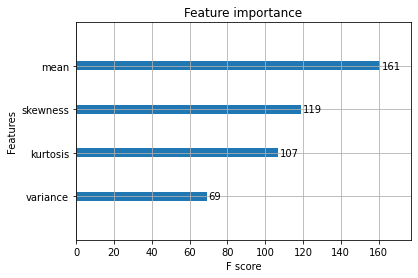

In [74]:
# plot feature importance
plot_importance(model)
pyplot.show()

#XGBoost trees diagram

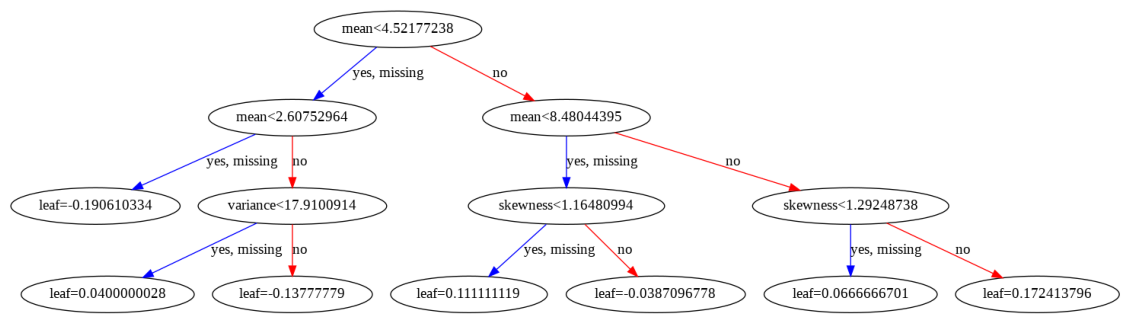

In [75]:
# plot_tree in xgboost gives a pictorial representation of the trees made
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_tree(model,ax=plt.gca());